In [73]:
# 1. Import the following packages:

import pandas as pd 
import matplotlib.pyplot as plt 
from seaborn import displot
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [2]:
# 2. Download the data from https://www.kaggle.com/roshansharma/online-shoppers-intention and load it in a Python data frame called df. Which data does it contain? Which business problem can be addressed with it?

df = pd.read_csv("online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


We could use the data above to determine the traffic on a business' website, number of unique visitors in comparison to returning visitors, time customers spend on the page, other important metrics such as conversion rate - which tracks the percentage of webvisits that adds revenue to a company, etc.

In [3]:
# 3. Remove all rows containing NANs from df. How big is the remaining dataset?
print("All dataset", df.shape)
print("\nColumns with null values\n\n", df.isnull().sum())
print("\nTotal null values: ", df.isnull().sum().sum())

All dataset (12330, 18)

Columns with null values

 Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

Total null values:  112


In [4]:
# remove all null values
df = df.dropna()
print("null values dropped: ", df.shape)

null values dropped:  (12316, 18)


In [5]:
#Run the following code. What is it doing? What does the result tell you about the data?
df.describe().loc[['min','max']]


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
min,0.0,-1.00,0.0,-1.000,0.0,-1.00000,0.0,0.0,0.000000,0.0,1.0,1.0,1.0,1.0
max,27.0,3398.75,24.0,2549.375,705.0,63973.52223,0.2,0.2,361.763742,1.0,8.0,13.0,9.0,20.0


In [25]:
# Remove all rows containing negative 'ProductRelated_Duration' and ‘ProductRelated_Duration’ greater than its 99%-quantile.
limit = int(df.ProductRelated_Duration.quantile([0.99]))
limit
df1 = df[(df['ProductRelated_Duration'] <= limit) & (df['ProductRelated_Duration'] >= 0)]
df1.shape
#df1.describe().loc[['min','max']]

(12159, 18)

For each of the below columns, examine graphically their relationship to the values of
‘Revenue’. Which variables would be good predictors for ‘Revenue’?
 'Administrative'
 'Administrative_Duration'
 'Informational'
 'Informational_Duration'
 'ProductRelated'
 'ProductRelated_Duration'
 'BounceRates'
 'ExitRates'
 'PageValues'
 'SpecialDay'
 'VisitorType'
 'Weekend'

In [26]:
df1.Revenue.value_counts()

False    10293
True      1866
Name: Revenue, dtype: int64

In [28]:
df1[df1.Revenue == True].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000
mean,3.279207,113.856572,0.743837,52.677240,42.785102,1642.385304,0.005115,0.019604,27.693002,0.023687,2.092712,2.458199,3.100214,4.048232
std,3.596806,190.789907,1.468079,157.819669,43.236074,1643.757254,0.012311,0.016616,35.427385,0.124855,0.937443,1.913861,2.407791,4.003327
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,15.000000,536.021429,0.000000,0.009375,3.886290,0.000000,2.000000,2.000000,1.000000,2.000000
50%,2.000000,50.500000,0.000000,0.000000,28.000000,1066.408334,0.000000,0.015971,17.259551,0.000000,2.000000,2.000000,3.000000,2.000000
75%,5.000000,145.000000,1.000000,16.000000,54.000000,2156.519052,0.006250,0.025000,39.552163,0.000000,2.000000,2.000000,4.000000,4.000000
max,22.000000,2086.750000,12.000000,1652.000000,310.000000,8622.380000,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [29]:
df1[df1.Revenue == False].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,10293.000000,10293.000000,10293.000000,10293.000000,10293.000000,10293.000000,10293.000000,10293.000000,10293.000000,10293.000000,10293.000000,10293.000000,10293.000000,10293.000000
mean,2.083746,71.783895,0.430973,27.849418,26.881084,978.237082,0.024924,0.047060,1.981163,0.068921,2.130088,2.338580,3.163703,4.082386
std,3.143043,161.217179,1.147083,121.898739,32.634591,1276.613888,0.051209,0.050714,9.117154,0.209720,0.909039,1.681876,2.401846,4.030347
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,6.000000,152.000000,0.000000,0.015559,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,16.000000,504.233333,0.004167,0.028571,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,3.000000,82.000000,0.000000,0.000000,34.000000,1299.500000,0.020000,0.053571,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,24.000000,2720.500000,16.000000,2252.033333,351.000000,8699.407065,0.200000,0.200000,246.758590,1.000000,8.000000,13.000000,9.000000,20.000000


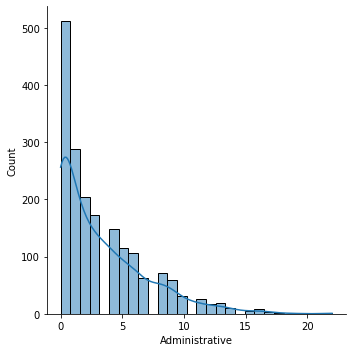

In [36]:
displot(data=df1[df1.Revenue == True], x="Administrative", kde=True)

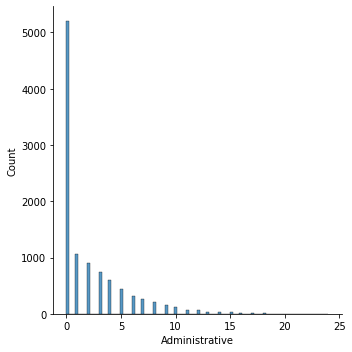

In [35]:
displot(data=df1[df1.Revenue == False], x="Administrative")

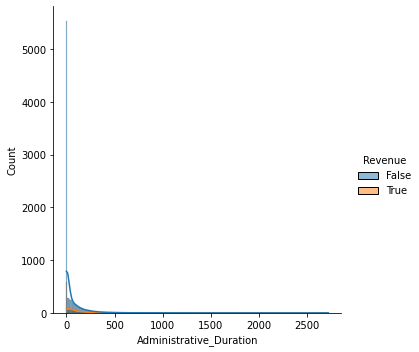

In [53]:
displot(data=df1, x="Administrative_Duration", kde=True,hue='Revenue')

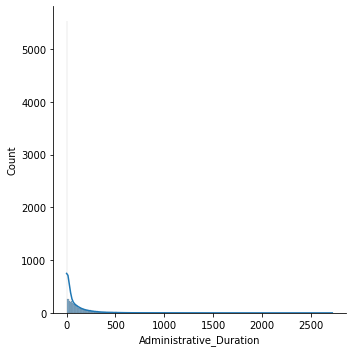

In [38]:
displot(data=df1[df1.Revenue == False], x="Administrative_Duration", kde=True)

<AxesSubplot:xlabel='Revenue', ylabel='Administrative'>

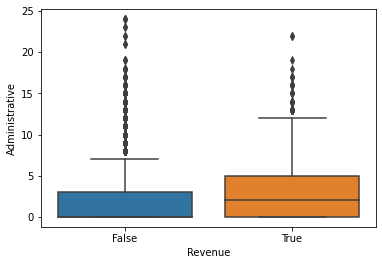

In [41]:
sns.boxplot(data = df1, x = 'Revenue', y = 'Administrative')

<AxesSubplot:xlabel='Revenue', ylabel='Administrative_Duration'>

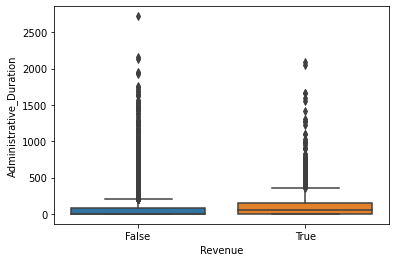

In [42]:
sns.boxplot(data = df1, x = 'Revenue', y = 'Administrative_Duration')

<AxesSubplot:xlabel='Revenue', ylabel='Informational'>

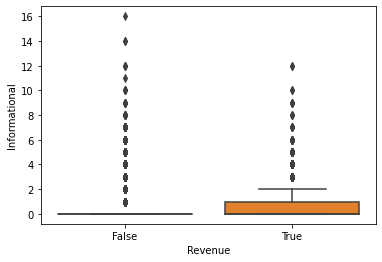

In [43]:
sns.boxplot(data = df1, x = 'Revenue', y = 'Informational')

<AxesSubplot:xlabel='Revenue', ylabel='Informational_Duration'>

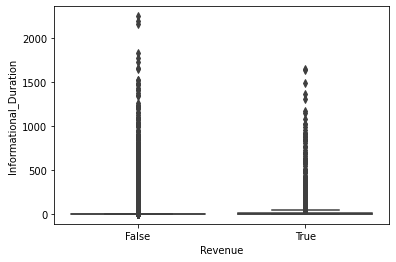

In [44]:
sns.boxplot(data = df1, x = 'Revenue', y = 'Informational_Duration')

<AxesSubplot:xlabel='Revenue', ylabel='ProductRelated'>

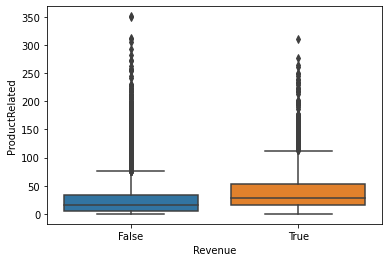

In [45]:
sns.boxplot(data = df1, x = 'Revenue', y = 'ProductRelated')

<AxesSubplot:xlabel='Revenue', ylabel='ProductRelated_Duration'>

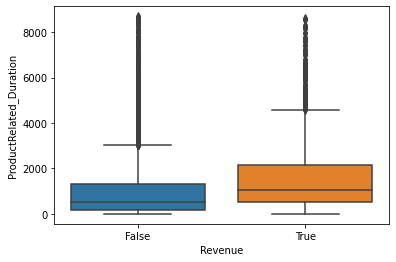

In [46]:
sns.boxplot(data = df1, x = 'Revenue', y = 'ProductRelated_Duration')

<AxesSubplot:xlabel='Revenue', ylabel='BounceRates'>

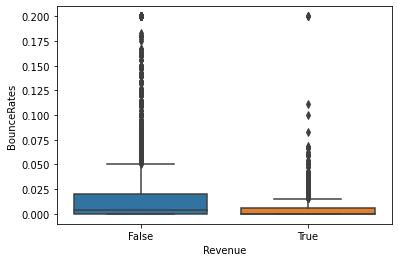

In [47]:
#correlation between revenue and BounceRates
sns.boxplot(data = df1, x = 'Revenue', y = 'BounceRates')

<AxesSubplot:xlabel='Revenue', ylabel='ExitRates'>

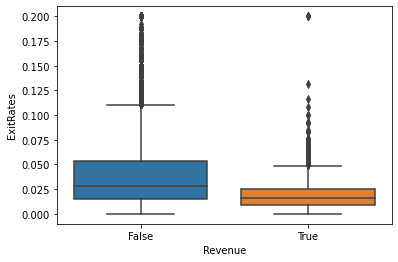

In [48]:
#correlation between revenue and exit rates
sns.boxplot(data = df1, x = 'Revenue', y = 'ExitRates')

<AxesSubplot:xlabel='Revenue', ylabel='PageValues'>

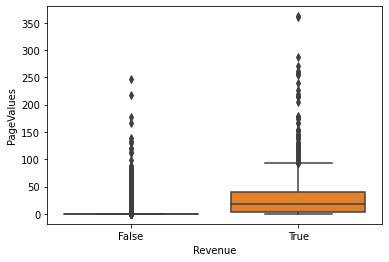

In [49]:
#The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 
sns.boxplot(data = df1, x = 'Revenue', y = 'PageValues')

<AxesSubplot:xlabel='Revenue', ylabel='SpecialDay'>

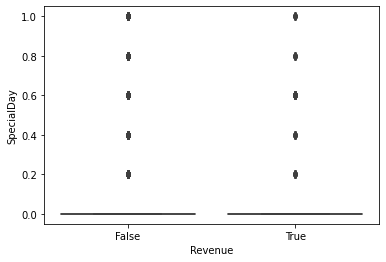

In [52]:
# The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8
#df1.SpecialDay.value_counts()
sns.boxplot(data = df1, x = 'Revenue', y = 'SpecialDay')

In [56]:
df1.VisitorType.value_counts()
cross = pd.crosstab(df1.VisitorType, df1.Revenue)

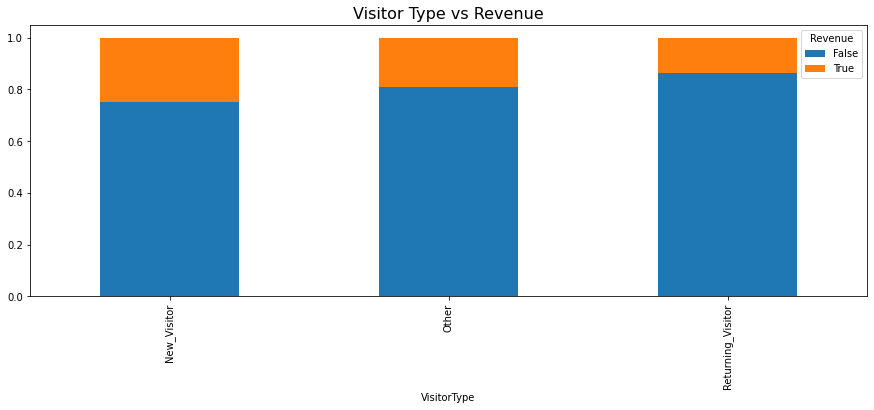

In [59]:
cross.div(cross.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5))
plt.title('Visitor Type vs Revenue', fontsize = 16)
plt.show()


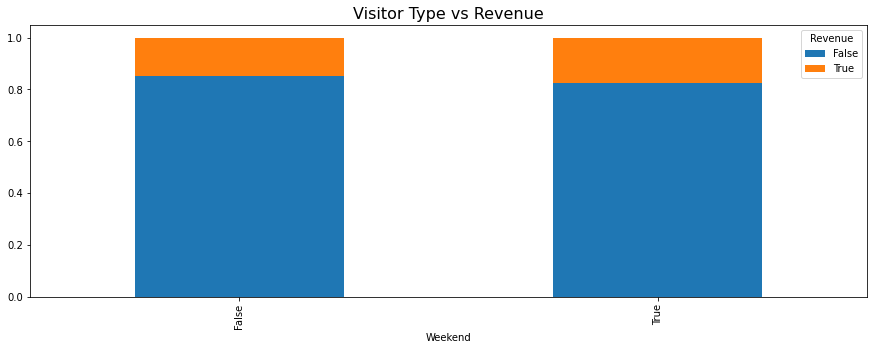

In [60]:

weekend = pd.crosstab(df1.Weekend, df1.Revenue)
weekend.div(weekend.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5))
plt.title('Visitor Type vs Revenue', fontsize = 16)
plt.show()


In [62]:
#Run the following code. What is it doing and why?
data1 = pd.get_dummies(df1)
data1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [63]:
data1.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

In [65]:
# Split the data into 80%/20% test and training data with a random_state=12 to predict ‘Revenue’ with all other variables in data1. Apply Grid search with 3-fold cross validation and a random forest classifier (random_state = 12) with the following parameters:
param_grid = {'min_samples_leaf': [2, 3, 4, 5], 'n_estimators': [10,50,100, 200, 300, 1000]}
X = data1.drop(['Revenue'], axis=1)
y = data1.Revenue
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)


In [68]:
rf = RandomForestClassifier(random_state=12)
gs = GridSearchCV(rf, param_grid=param_grid, cv= 3)
gs.fit(X_train, y_train)
gs.best_params_

{'min_samples_leaf': 3, 'n_estimators': 200}

In [72]:
#train score /accuracy
gs.best_score_

0.9022310918297967

In [74]:
#test score / accuracy
accuracy_score(y_test, y_pred)

0.9115953947368421

In [69]:
y_pred = gs.predict(X_test)

In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.93      0.97      0.95      2073
        True       0.78      0.56      0.65       359

    accuracy                           0.91      2432
   macro avg       0.85      0.77      0.80      2432
weighted avg       0.91      0.91      0.91      2432



. Use grid_search.best_estimator_.feature_importances_ to determine the most
important features from the model. Do they correspond to the ones in Question 6.?

In [76]:
gs.best_estimator_.feature_importances_

array([3.91730779e-02, 4.86860342e-02, 1.17628295e-02, 2.12177449e-02,
       6.32646117e-02, 8.18926318e-02, 4.84615213e-02, 7.92203271e-02,
       4.56589089e-01, 2.11066781e-03, 1.17657221e-02, 1.21290688e-02,
       2.34332863e-02, 2.43473489e-02, 7.90991606e-03, 1.82193414e-03,
       4.78841295e-03, 7.11395660e-05, 2.04361027e-03, 6.19387538e-04,
       5.63492280e-03, 7.11979544e-03, 2.37914479e-02, 2.37941594e-03,
       2.84168228e-03, 7.49975485e-03, 1.67746513e-04, 9.25687188e-03])

In [80]:
imp = pd.DataFrame(X.columns, gs.best_estimator_.feature_importances_)
imp.sort_index(ascending=False)

,0
0.456589,PageValues
0.081893,ProductRelated_Duration
0.079220,ExitRates
0.063265,ProductRelated
0.048686,Administrative_Duration
0.048462,BounceRates
0.039173,Administrative
0.024347,TrafficType
0.023791,Month_Nov
0.023433,Region
